# Quantum Mechanics Homework 1
- **Name**: Juan Daniel Vasconez Vela
- **Semester**: IISEM2024
- **Date**: November 2024
- **Last Update**: 11/14/2024
---

# Problem 1:  Quantum Harmonic Oscillator

Use the normalised stationary states, $\psi_n(x)$, for the quantum harmonic oscillator, which we computed in class, to:

## Write down the first 6 stationary states with their respective energies

As made in class, we can know that the solution of the Schrodinger equation for the Harmonic Oscilator is denoted as:
$$
\Psi_n (x) = (\frac{m\gamma}{\pi \hbar})^{\frac{1}{4}} \frac{1}{\sqrt{2^n n!}} H_n(\xi) e^{\frac{-\xi^2}{2}}
$$
Where 
- $H_n$ is the n Hermite Polynomial 
- $\xi$ =  $\sqrt{\frac{m \omega}{\hbar}}x$

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as ctn
import sympy as sym
import math as mt

In [2]:
n, x = sym.symbols('n x')
m, omega, hbar = sym.symbols('m omega hbar', real=True, positive=True)

xi = sym.sqrt(m * omega / hbar) * x

def psi_n_sym(n_value):
    Hn_value = sym.hermite(n_value, xi)
    prefactor = (m * omega / (sym.pi * hbar))**0.25 / sym.sqrt(2**n_value * sym.factorial(n_value))
    wavefunction = sym.simplify(prefactor * Hn_value * sym.exp(-xi**2 / 2))
    return wavefunction

print("First six stationary states :\n")
for n_value in range(6):
    wavefunction = psi_n_sym(n_value)
    print(f"State n={n_value}:")
    print(f"  Wavefunction ψ_{n_value}(x):")
    display(wavefunction)
    print("\n")

First six stationary states :

State n=0:
  Wavefunction ψ_0(x):


m**0.25*omega**0.25*exp(-m*omega*x**2/(2*hbar))/(pi**0.25*hbar**0.25)



State n=1:
  Wavefunction ψ_1(x):


sqrt(2)*m**0.75*omega**0.75*x*exp(-m*omega*x**2/(2*hbar))/(pi**0.25*hbar**0.75)



State n=2:
  Wavefunction ψ_2(x):


sqrt(2)*m**0.25*omega**0.25*(-hbar/2 + m*omega*x**2)*exp(-m*omega*x**2/(2*hbar))/(pi**0.25*hbar**1.25)



State n=3:
  Wavefunction ψ_3(x):


sqrt(3)*m**0.75*omega**0.75*x*(-3*hbar + 2*m*omega*x**2)*exp(-m*omega*x**2/(2*hbar))/(3*pi**0.25*hbar**1.75)



State n=4:
  Wavefunction ψ_4(x):


sqrt(6)*m**0.25*omega**0.25*(hbar**2/4 - hbar*m*omega*x**2 + m**2*omega**2*x**4/3)*exp(-m*omega*x**2/(2*hbar))/(pi**0.25*hbar**2.25)



State n=5:
  Wavefunction ψ_5(x):


sqrt(15)*m**0.75*omega**0.75*x*(15*hbar**2 - 20*hbar*m*omega*x**2 + 4*m**2*omega**2*x**4)*exp(-m*omega*x**2/(2*hbar))/(30*pi**0.25*hbar**2.75)

## Sketch the probability density functions of the first 6 stationary states, |ψn(x)|2, versus x, with your favourite programming tool.

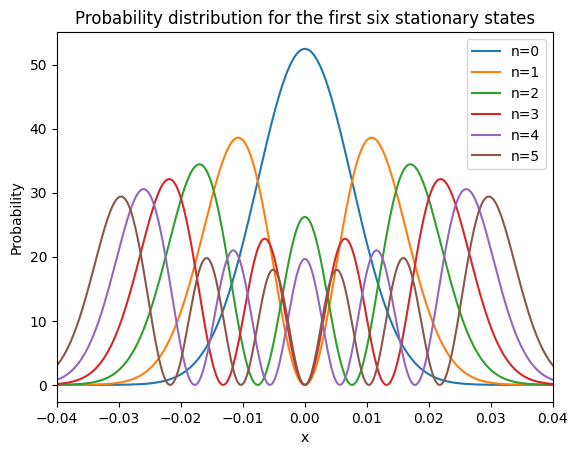

In [85]:
hbar = ctn.hbar
pi = ctn.pi
m = ctn.m_e
omega = 1

x = np.linspace(-1, 1, 10000)
xi = np.sqrt(m * omega / hbar) * x


def psi_n(n):
    Hn = sp.special.eval_hermite(n, xi)
    prefactor = (m * omega / (pi * hbar))**0.25 / float(np.sqrt(2**n * sp.special.factorial(n)))
    wavefunction = prefactor * Hn * np.exp(-xi**2 / 2)
    return wavefunction

def prob(psi_n):
    return np.conj(psi_n) * psi_n

for n in range(6):
    plt.plot(x, prob(psi_n(n)), label=f"n={n}")
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.title('Probability distribution for the first six stationary states')
    plt.xlim(-0.04, 0.04)
    plt.legend()
plt.show()


## Write down and sketch |ψ50(x)|2. Compare it to the classical distribution. What is thedifference between classical and quantum harmonic oscillators?

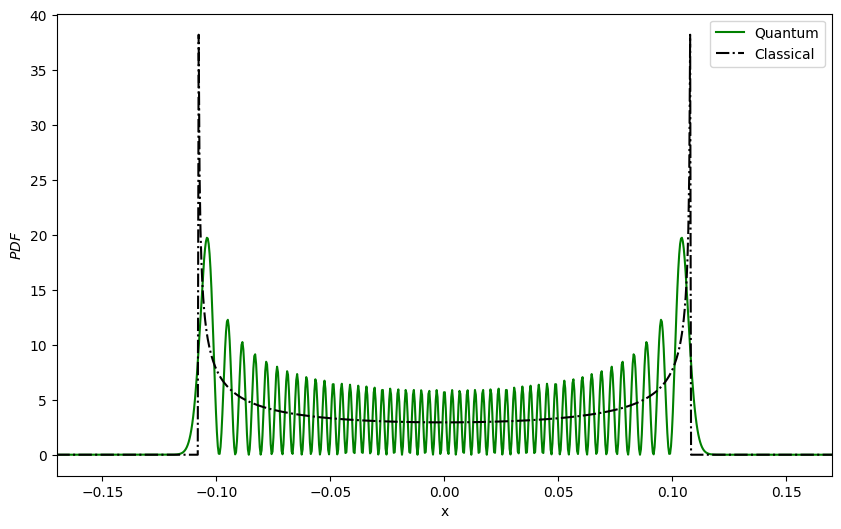

In [95]:
n = 50  
E = (n + 1/2) * hbar * omega
A = np.sqrt(2 * E / (m * omega**2))

x2 = np.linspace(-2, 2, 10000)
xi2 = np.sqrt(m * omega / hbar) * x2

def psi_n(n, xi):
    Hn = sp.special.eval_hermite(n, xi)
    prefactor = (m * omega / (np.pi * hbar))**0.25 / np.sqrt(2**n * sp.special.factorial(n))
    wavefunction = prefactor * Hn * np.exp(-xi**2 / 2)
    return wavefunction


def ClassicalPDF(x, a):
    P = np.zeros_like(x)
    inside_mask = np.abs(x) <= a  
    P[inside_mask] = 1 / (np.pi * np.sqrt(a**2 - x[inside_mask]**2))
    return P

y_50 = prob(psi_n(n, xi2))
y_clas = ClassicalPDF(x2, A)

plt.figure(figsize=(10, 6))
plt.plot(x2, y_50, color='green', label=r"Quantum")
plt.plot(x2, y_clas, color='black', linestyle='-.', label=r"Classical")
plt.xlabel(r"x")
plt.ylabel(r"$PDF$")
plt.legend()
plt.xlim(-0.17, 0.17)
plt.show()

The solutions for large n in the quantum harmonic oscilator converge into the classical probability of an harmonic oscilator. The main difference we can tell is that quantum distro has a non zero probability outside of the potential 